Test points:
1. (25, 32)
2. (24.2, 31.5)
3. (22, 34)
4. (20.5, 34)



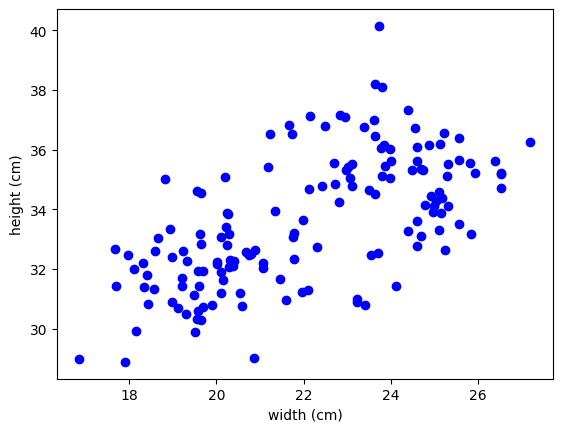

In [56]:
import numpy as np
import matplotlib.pyplot as plt

path = "datapoints.txt"               

data_dict = {}                             # Skapar en tom dictionary.


with open(path, 'r') as file:              # Öppnar och läser in filen
    next(file)                             # Hoppar över HEAD i textfilen.
    
    for line in file:                       
        parts = line.strip().split(',')    # Loopar igenom txt och tar bort whitespaces och splittar lines med kommatecken.
        
        width = float(parts[0])            # Beskriver postion i txt samt gör om string till float eller integer. Key and value.
        height = float(parts[1])
        label = int(parts[2])
        
        
        data_dict[(width, height)] = label
       


def scatter():
    for (width,height) in data_dict:                # Loopar och scatter datapointsen, width & height
        plt.scatter(width,height, c= "blue")
        
        plt.xlabel("width (cm)")
        plt.ylabel("height (cm)")
        plt.show
scatter()



def get_testpoints():                               # Öppnar och läser testpoints
    path = "testpoints.txt"
    with open(path, "r") as file:
        print(file.read())

get_testpoints()



